In [5]:
#requeired libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#downlad the imdb dataset included in Keras
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.imdb.load_data()

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
#print a sample
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
#print the number of samples
print(f"X_train: {len(X_train)}")
print(f"X_test:: {len(X_test)}")

X_train: 25000
X_test:: 25000


In [7]:
#preprocessing
#concatenate X_test and X_train | y_train and y_test
X=np.concatenate((X_train,X_test),axis=0)
y=np.concatenate((y_train,y_test),axis=0)

In [8]:
# padding

#padd all reviews in the X dataset to the length maxlen=1024

X=tf.keras.preprocessing.sequence.pad_sequences(X,maxlen=1024)

In [10]:
#Splitting

#create the training datasets
X_train =X[:40000]
y_train=y[:40000]

#create the validation datasets
X_val =X[40000:45000]
y_val =y[40000:45000]

#create the test datasets
X_test=X[45000:50000]
y_test=y[45000:50000]

In [14]:
#print the number of samples
print(f"X_train: {len(X_train)}")
print(f"y_train: {len(y_train)}")
print(f"X_val: {len(X_val)}")
print(f"y_val: {len(y_val)}")
print(f"X_test: {len(X_test)}")
print(f"y_test: {len(y_test)}")

X_train: 40000
y_train: 40000
X_val: 5000
y_val: 5000
X_test: 5000
y_test: 5000


In [17]:
#consturcting the nueral network
model=tf.keras.Sequential([
    #embedding layer

    #add an embedding layer and a dropout
    tf.keras.layers.Embedding(input_dim=10000,output_dim=256),
    tf.keras.layers.Dropout(0.7),

    #add a LSTM layer with dropout
    tf.keras.layers.LSTM(256),
    tf.keras.layers.Dropout(0.7),

    # add a Dense layer with dropout
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(0.7),


    #add te output layer
    tf.keras.layers.Dense(1,activation="sigmoid")
    

])

In [18]:
#Optimizer
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.binary_crossentropy,
    metrics=["accuracy"]
)

In [26]:
#Training The Model

#trainig the model for 5 epochs with batch size of 128

results= model.fit(X_train,y_train,epochs=15,batch_size=128,validation_data=(X_val,y_val))

Epoch 1/15
313/313 [==============================] - 58s 184ms/step - loss: 0.6348 - accuracy: 0.6413 - val_loss: 0.6378 - val_accuracy: 0.6336
Epoch 2/15
313/313 [==============================] - 57s 182ms/step - loss: 0.5017 - accuracy: 0.7594 - val_loss: 0.3432 - val_accuracy: 0.8600
Epoch 3/15
313/313 [==============================] - 57s 182ms/step - loss: 0.3637 - accuracy: 0.8493 - val_loss: 0.3587 - val_accuracy: 0.8590
Epoch 4/15
313/313 [==============================] - 56s 180ms/step - loss: 0.2632 - accuracy: 0.9053 - val_loss: 0.2598 - val_accuracy: 0.8926
Epoch 5/15
313/313 [==============================] - 56s 180ms/step - loss: 0.2042 - accuracy: 0.9279 - val_loss: 0.2836 - val_accuracy: 0.8888
Epoch 6/15
313/313 [==============================] - 56s 181ms/step - loss: 0.1787 - accuracy: 0.9385 - val_loss: 0.2558 - val_accuracy: 0.8964
Epoch 7/15
313/313 [==============================] - 56s 180ms/step - loss: 0.1612 - accuracy: 0.9436 - val_loss: 0.3034 - val_ac

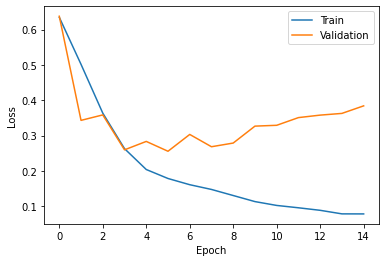

In [27]:
#Visualize the results

plt.plot(results.history["loss"],label="Train")

plt.plot(results.history["val_loss"],label="Validation")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()
plt.show()

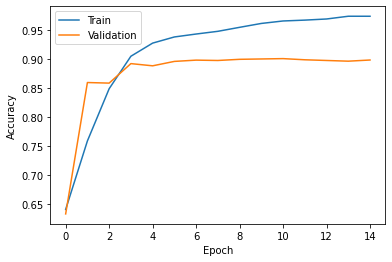

In [28]:
plt.plot(results.history["accuracy"],label="Train")

plt.plot(results.history["val_accuracy"],label="Validation")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [29]:
#Evaluate the performance

model.evaluate(X_test,y_test)

157/157 [==============================] - 4s 25ms/step - loss: 0.4068 - accuracy: 0.8948


[0.40683266520500183, 0.8948000073432922]

In [30]:
#try a prediciton

prediction_result=model.predict(X_test[789].reshape(1,1024))

In [31]:
print(f"Label:{y_test[789]} | Prediction : {prediction_result}")

Label:0 | Prediction : [[0.00127229]]
